In [157]:
import pandas as pd
import re

In [158]:
# Load the CSV file
df = pd.read_csv('cleaned_steam_data.csv')

In [159]:
# Select specific columns
df_cleaned = df[['AppID', 'Name', 'Positive_ratings', 'Negative_ratings', 'Price']].copy()

In [160]:
# Function to clean game names
def clean_name(name):
    # Remove non-ASCII characters and symbols
     return re.sub(r'[^\x00-\x7F]', '', name)

In [161]:
# Apply the function to clean names
df_cleaned['Name'] = df_cleaned['Name'].apply(clean_name)

In [162]:
# Compute the difference between positive and negative ratings
df_cleaned['Rating_difference'] = df_cleaned['Positive_ratings'] - df_cleaned['Negative_ratings']

In [163]:
# Remove games priced over $100
df_cleaned = df_cleaned[df_cleaned['Price'] <= 100]

In [164]:
# Filter out rows where Positive_ratings is greater than 1,000,000
df_cleaned = df_cleaned[df_cleaned['Positive_ratings'] <= 1000000]

In [165]:
# Filter out rows where Negative_ratings is greater than 1,000,000
df_cleaned = df_cleaned[df_cleaned['Negative_ratings'] <= 500000]

In [166]:
# Get top 100 by positive ratings
top_positive = df_cleaned.nlargest(50, 'Positive_ratings')

In [167]:
# Get top 100 by negative ratings
top_negative = df_cleaned.nlargest(50, 'Negative_ratings')

In [168]:
# Get top 100 by rating difference
top_difference = df_cleaned.nlargest(50, 'Rating_difference')

In [169]:
# Combine all top datasets and remove duplicates
df_top_300 = pd.concat([top_positive, top_negative, top_difference]).drop_duplicates()

In [170]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23234 entries, 0 to 23238
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AppID              23234 non-null  int64  
 1   Name               23234 non-null  object 
 2   Positive_ratings   23234 non-null  int64  
 3   Negative_ratings   23234 non-null  int64  
 4   Price              23234 non-null  float64
 5   Rating_difference  23234 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [171]:
df_cleaned.head()

,AppID,Name,Positive_ratings,Negative_ratings,Price,Rating_difference
0,263380,Driftmoon,223,28,14.99,195
1,263340,Continue?9876543210,97,78,9.99,19
2,262550,Gunman Clive,656,86,1.99,570
3,264320,Captain Morgane and the Golden Turtle,102,66,4.99,36
4,263680,Unearthed: Trail of Ibn Battuta - Episode 1 - ...,429,380,4.99,49


In [172]:
# Save the processed data to a new CSV file
df_top_300.to_csv('processed_data.csv', index=False)

In [173]:
# Convert the DataFrame to JSON format
json_data = df_top_300.to_json(orient='records', lines=False)

# Save the JSON data to a file
with open('processed_data.json', 'w') as file:
    file.write(json_data)

In [174]:
from pymongo import MongoClient
import pandas as pd

In [175]:
# Load the processed CSV file
df_top_300 = pd.read_csv('processed_data.csv')

In [176]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['app_data']
collection = db['apps']

In [177]:
# Convert DataFrame to dictionary and insert into MongoDB
data_dict = df_top_300.to_dict(orient='records')
collection.insert_many(data_dict)

InsertManyResult([ObjectId('66debccb5d2218c50774ee0f'), ObjectId('66debccb5d2218c50774ee10'), ObjectId('66debccb5d2218c50774ee11'), ObjectId('66debccb5d2218c50774ee12'), ObjectId('66debccb5d2218c50774ee13'), ObjectId('66debccb5d2218c50774ee14'), ObjectId('66debccb5d2218c50774ee15'), ObjectId('66debccb5d2218c50774ee16'), ObjectId('66debccb5d2218c50774ee17'), ObjectId('66debccb5d2218c50774ee18'), ObjectId('66debccb5d2218c50774ee19'), ObjectId('66debccb5d2218c50774ee1a'), ObjectId('66debccb5d2218c50774ee1b'), ObjectId('66debccb5d2218c50774ee1c'), ObjectId('66debccb5d2218c50774ee1d'), ObjectId('66debccb5d2218c50774ee1e'), ObjectId('66debccb5d2218c50774ee1f'), ObjectId('66debccb5d2218c50774ee20'), ObjectId('66debccb5d2218c50774ee21'), ObjectId('66debccb5d2218c50774ee22'), ObjectId('66debccb5d2218c50774ee23'), ObjectId('66debccb5d2218c50774ee24'), ObjectId('66debccb5d2218c50774ee25'), ObjectId('66debccb5d2218c50774ee26'), ObjectId('66debccb5d2218c50774ee27'), ObjectId('66debccb5d2218c50774ee

In [178]:
from mplfonts import use_font
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [179]:
# Load processed data
df_top_300 = pd.read_csv('processed_data.csv')

In [180]:
def create_plot(x_col, y_col, title, filename):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x_col, y=y_col, data=df_top_300, hue='Name', palette='viridis')
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel(y_col)
    plt.legend(title='Game Names', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()

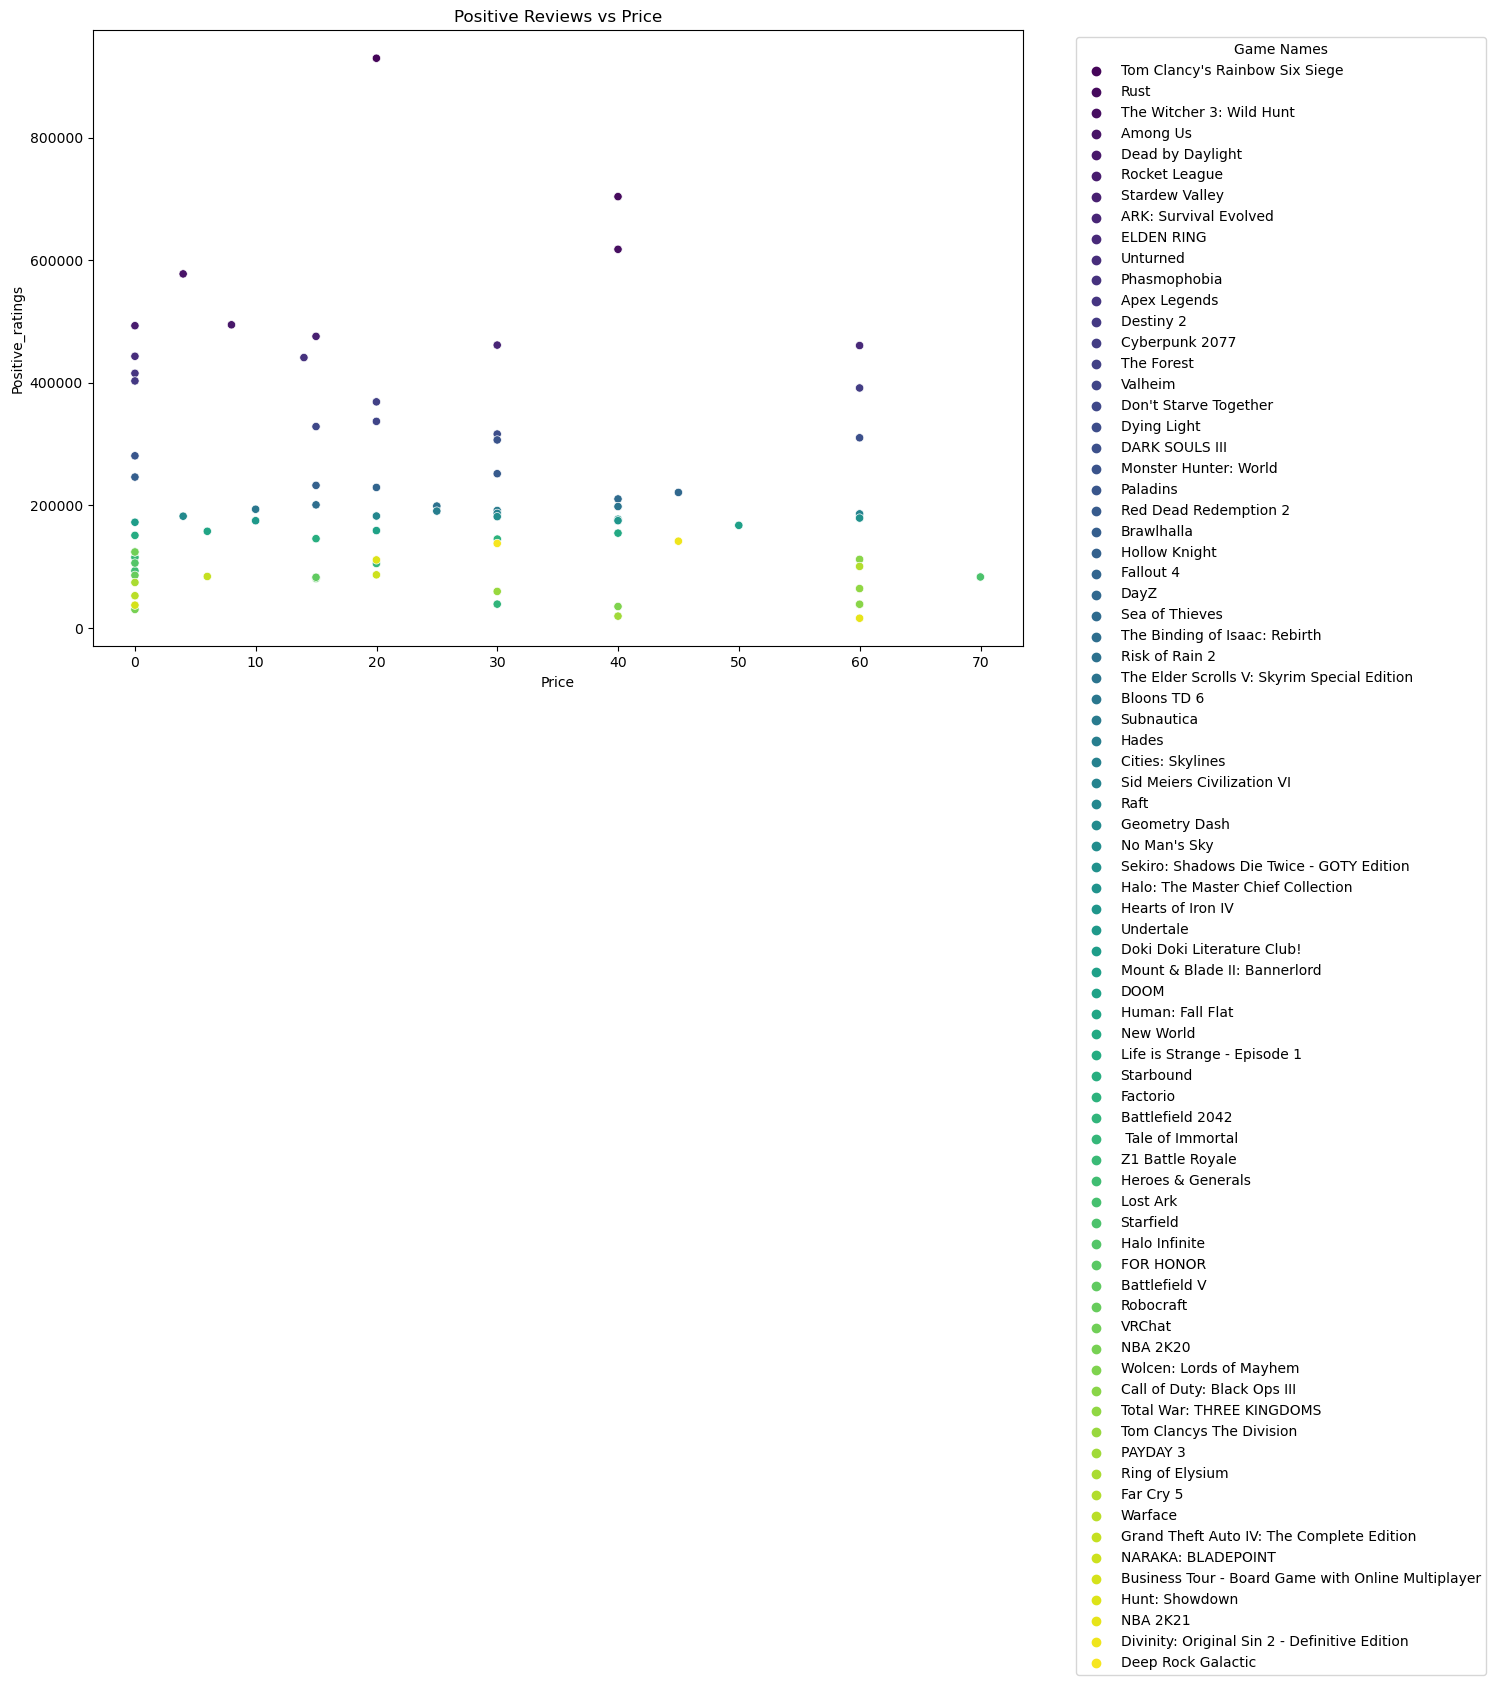

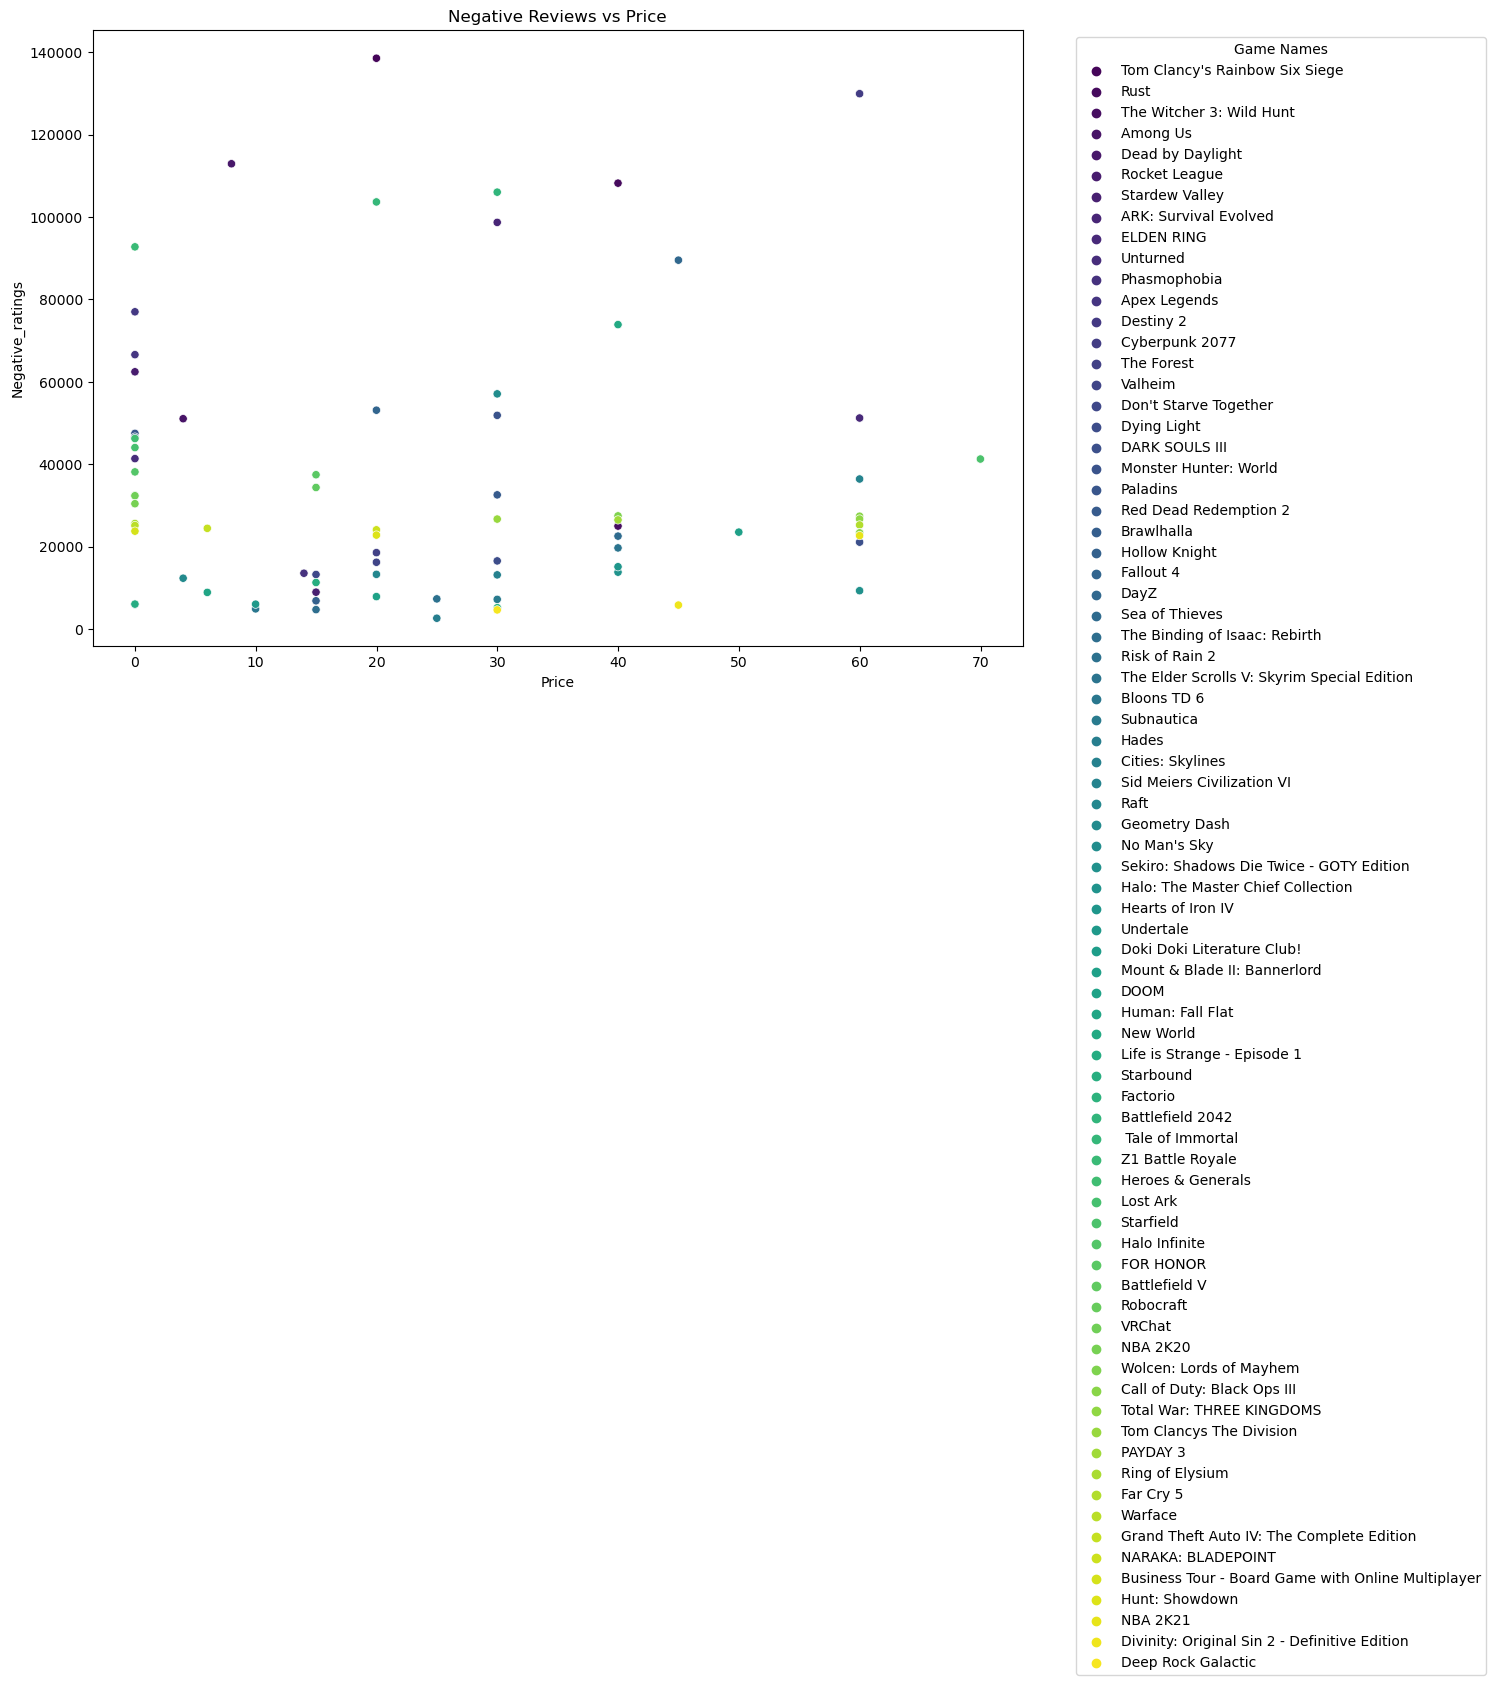

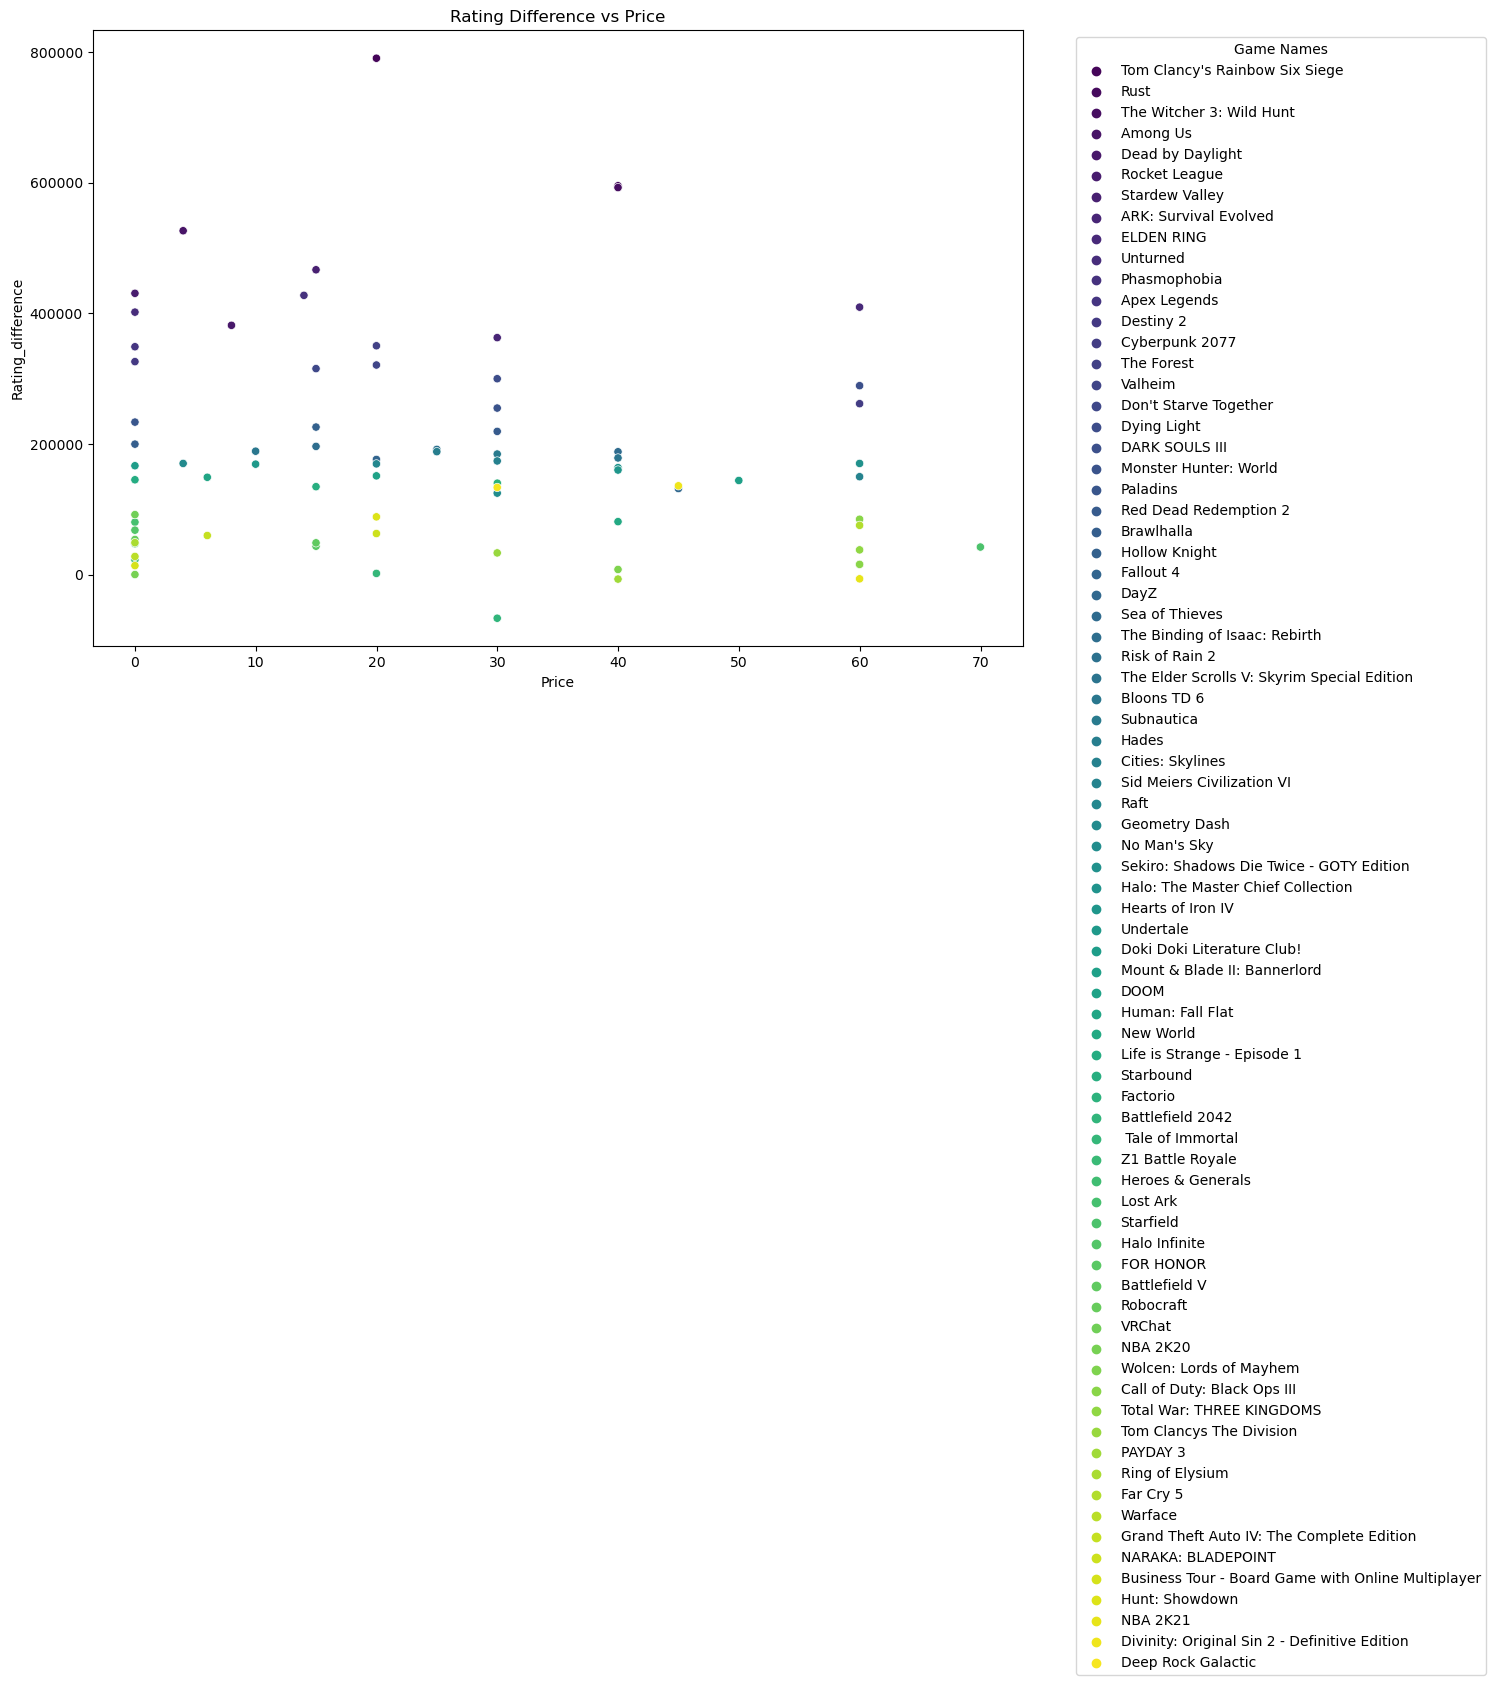

In [181]:
# Create and save plots
create_plot('Price', 'Positive_ratings', 'Positive Reviews vs Price', 'positive_vs_price.png')
create_plot('Price', 'Negative_ratings', 'Negative Reviews vs Price', 'negative_vs_price.png')
create_plot('Price', 'Rating_difference', 'Rating Difference vs Price', 'rating_difference_vs_price.png')

In [182]:
print("Plots created and saved as PNG files.")

Plots created and saved as PNG files.
